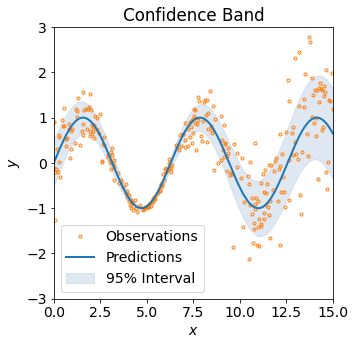

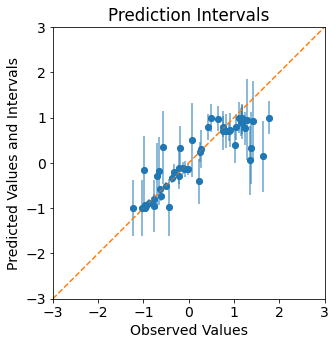

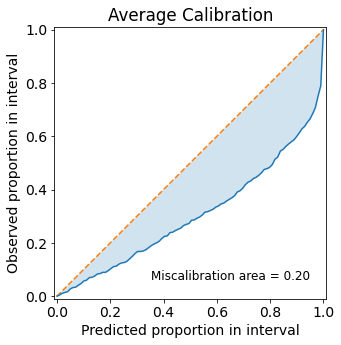

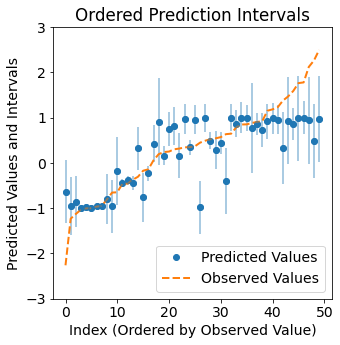

MACE: 0.19429230769230776, RMSCE: 0.21753026807398695, MA: 0.1962548562548563


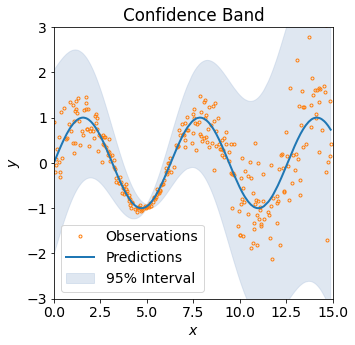

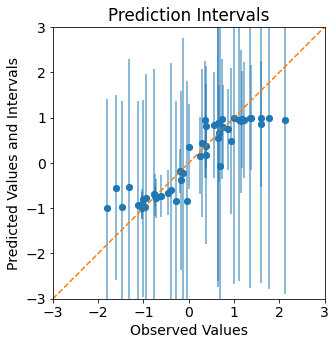

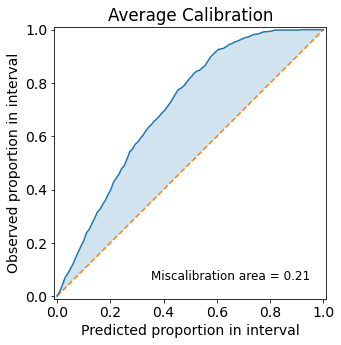

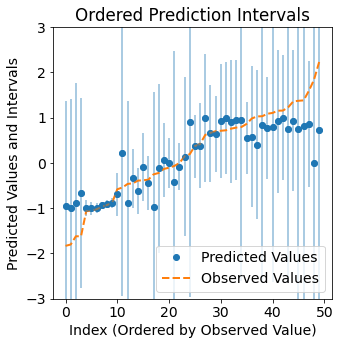

MACE: 0.20692307692307693, RMSCE: 0.23002988045213346, MA: 0.20901320901320894


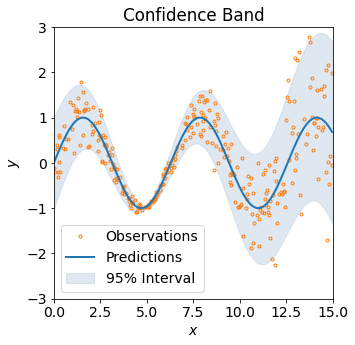

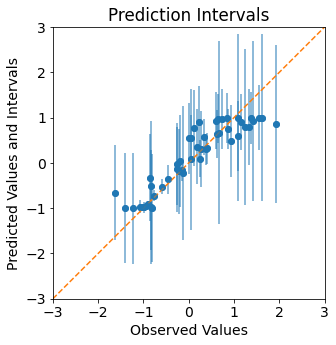

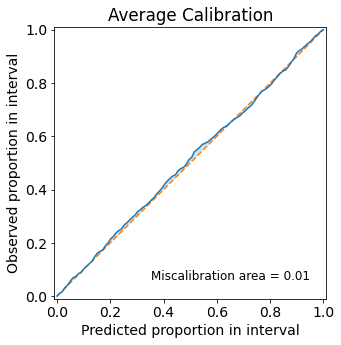

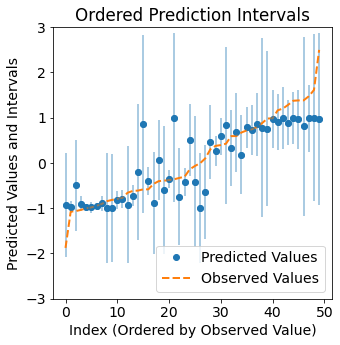

MACE: 0.008618026418026406, RMSCE: 0.010400269264830841, MA: 0.008645821828385835


In [2]:
"""
Examples of code for visualizations.
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

import uncertainty_toolbox.data as udata
import uncertainty_toolbox.metrics as umetrics
import uncertainty_toolbox.viz as uviz

import neatplot

# neatplot.set_style()
# neatplot.update_rc("text.usetex", False)  # Set to True for system latex


# Set random seed
np.random.seed(11)

# Generate synthetic predictive uncertainty results
n_obs = 650
f, std, y, x = udata.synthetic_sine_heteroscedastic(n_obs)

# Save figure (set to True to save)
savefig = False


def save_figure(name_str, file_type="png"):
    """Save figure, or do nothing if savefig is False."""
    if savefig:
        neatplot.save_figure(name_str, file_type)


def update_rc_params():
    """Update matplotlib rc params."""
    plt.rcParams.update({"font.size": 14})
    plt.rcParams.update({"xtick.labelsize": 14})
    plt.rcParams.update({"ytick.labelsize": 14})


def make_plots(pred_mean, pred_std, idx1, idx2):
    """Make set of plots."""

    update_rc_params()
    ylims = [-3, 3]
    n_subset = 50

    # Make xy plot
    uviz.plot_xy(pred_mean, pred_std, y, x, n_subset=300, ylims=ylims, xlims=[0, 15])
    save_figure(f"xy_{idx1}_{idx2}")
    plt.show()

    # Make intervals plot
    uviz.plot_intervals(pred_mean, pred_std, y, n_subset=n_subset, ylims=ylims)
    save_figure(f"intervals_{idx1}_{idx2}")
    plt.show()

    # Make calibration plot
    uviz.plot_calibration(pred_mean, pred_std, y)
    save_figure(f"calibration_{idx1}_{idx2}")
    plt.show()

    # Make ordered intervals plot
    uviz.plot_intervals_ordered(pred_mean, pred_std, y, n_subset=n_subset, ylims=ylims)
    save_figure(f"intervals_ordered_{idx1}_{idx2}")
    plt.show()


# List of predictive means and standard deviations
pred_mean_list = [f]

pred_std_list = [
    std * 0.5,  # overconfident
    std * 2.0,  # underconfident
    std,  # correct
]

# Loop through, make plots, and compute metrics
for i, pred_mean in enumerate(pred_mean_list):
    for j, pred_std in enumerate(pred_std_list):
        mace = umetrics.mean_absolute_calibration_error(pred_mean, pred_std, y)
        rmsce = umetrics.root_mean_squared_calibration_error(pred_mean, pred_std, y)
        ma = umetrics.miscalibration_area(pred_mean, pred_std, y)

        make_plots(pred_mean, pred_std, i, j)

        print(f"MACE: {mace}, RMSCE: {rmsce}, MA: {ma}")